In [1]:
from spec_extract import *
from astropy.table import Table
import pandas as pd
from glob import glob
from spec_tools import Source_present
from grizli import multifit

### set home for files
hpath = os.environ['HOME'] + '/'

if hpath == '/Users/Vince.ec/':
    dpath = '/Volumes/Vince_research/Data/' 
    
else:
    dpath = hpath + 'Data/' 


In [20]:
gsd_cat = pd.read_pickle('../dataframes/clear_q_gsd.pkl')
gnd_cat = pd.read_pickle('../dataframes/clear_q_gnd.pkl')

In [3]:
sids = []
sfld = []
for i in gsd_cat.index:
    sids.append(gsd_cat.id[i])
    sfld.append(str(gsd_cat.grism_id_x[i])[2:].split('-')[0])

In [5]:
gsd_fields = ['ERSPRIME', 'GS1', 'GS2', 'GS3', 'GS4', 'GS5']
gnd_fields = ['GN1', 'GN2', 'GN3', 'GN4', 'GN5', 'GN7']

In [15]:
field = 'GSD'
skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in range(len(sfld)):
        if sfld[ii] == gsd_fields[i]:
            try:
                ex = Extract_all(sids[ii], field, grp)
                ex.Phot_save()
                ex.Extract_spec()
                ex.Extract_BeamCutout()
            except:
                skipped.append(sids[ii])

Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21b8q.01.GrismFLT.fits!
Load /Users/

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3457: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3458: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf 

Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01iqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01j4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01jbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01ixq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS1/icxt07dxq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS1/icxt07dzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt07e2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt07e4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08e7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08e9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08ecq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08eeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt10dbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt10deq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt10diq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11i3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11hwq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11hpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11hiq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29ncq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29nkq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29nsq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29nzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33tiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33tpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33twq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33u3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt31r1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt31r3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt31r6q.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07ynq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07ygq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07yuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07z1q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32qvq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32r2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32r9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32rgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34h8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34hiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34huq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34i1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36huq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36i4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36j3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36jbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj37uaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj37uhq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj37uoq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30cdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30c6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30bzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30ckq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35vuq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35w1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35w8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35wfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13gfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13ghq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13gkq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13gmq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14roq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14rqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14rtq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14rvq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt15emq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt15enq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt15esq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

In [16]:
skipped

[43114, 43683, 44725]

In [17]:
nids = []
nfld = []
for i in gnd_cat.index:
    nids.append(gnd_cat.id[i])
    nfld.append(str(gnd_cat.grism_id_x[i])[2:].split('-')[0])

In [20]:
field = 'GND'
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[i])))
    for ii in range(len(nfld)):
        if nfld[ii] == gnd_fields[i]:
            try:
                ex = Extract_all(nids[ii], field, grp)
                ex.Phot_save()
                ex.Extract_spec()
                ex.Extract_BeamCutout()
            except:
                skipped.append(nids[ii])

Load /Users/vestrada/Data/Grism_fields/GN1/ib3720f0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/ib3720fgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/ib3720fkq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN1/icxt46swq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN1/icxt46sxq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt46t0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt46t2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xcq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xhq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mhq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mtq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt49hmq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt49hnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt49hqq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3457: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3458: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf 

Load /Users/vestrada/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725dyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725e2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725eeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725eiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3748v8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3748vdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/icxt51jvq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GN3/ib3718amq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3718aiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3718ayq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3718b2q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN3/ib3719ukq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN3/ib3719uoq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3719v7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3719vbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56tbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56tcq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56tfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56thq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57a1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57aoq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57aqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57zyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt58a9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt58aeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt58b2q.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.cont

Load /Users/vestrada/Data/Grism_fields/GN4/ib3722j5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3722j9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3722jlq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3722jpq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN4/ib3725dyq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN4/ib3725e2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3725eeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3725eiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726bpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726btq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726c5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726c9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61gvq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61gwq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61gzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61h1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt62lkq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt62llq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt62loq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1

Load /Users/vestrada/Data/Grism_fields/GN5/ib3717x7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3717wnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3717wrq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3717x3q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN5/ib3718aiq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN5/ib3718amq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3718ayq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3718b2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42q5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42q6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42q9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42qbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt43vsq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt43vtq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt43vwq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.cont

Load /Users/vestrada/Data/Grism_fields/GN7/ib3706b6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3706biq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3706bpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3706b2q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN7/ib3707caq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN7/ib3707ceq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3707cqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3707cuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708i5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708i9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708ilq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708ipq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746tuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746ujq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746urq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746uxq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3747a5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3747z0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3747z5q.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1

In [21]:
skipped

[37922, 38235, 21427, 36672, 14140]

In [2]:
ex_gsd_cat = pd.read_pickle('../dataframes/extra_q_gsd.pkl')
ex_gnd_cat = pd.read_pickle('../dataframes/extra_q_gnd.pkl')

In [3]:
xsids = []
xsfld = []
for i in ex_gsd_cat.index:
    for ii in ex_gsd_cat.fields[i]:
        xsids.append(ex_gsd_cat.gids[i])
        xsfld.append(ii)

In [6]:
field = 'GSD'
skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    mod = 'none'
    for ii in range(len(xsfld)):
        if xsfld[ii] == gsd_fields[i]:
            if os.path.isfile('../spec_files/GSD_{0}_g102.npy'.format(xsids[ii])):
                mod = 2
            try:
                ex = Extract_all(xsids[ii], field, grp,spec_name_mod = mod)
                ex.Phot_save()
                ex.Extract_spec()
                ex.Extract_BeamCutout()
            except:
                skipped.append(xsids[ii])

Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21b8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21bcq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21beq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt22pmq.01.GrismFLT.fits!
Load /Users/

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3457: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3458: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf 

Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01ixq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01jbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01j4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/ibhj01iqq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS1/icxt07dxq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS1/icxt07dzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt07e2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt07e4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08e7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08e9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08ecq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt08eeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt09f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt10dbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt10deq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS1/icxt10diq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GS2/ibhj03xvq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj03xoq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj03y2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj03y9q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS2/ibhj11hiq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS2/ibhj11hpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj11hwq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj11i3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj35vuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj35w1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj35w8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/ibhj35wfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt01cgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt01ciq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt01clq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt01cnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt02c7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt02caq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS2/icxt02cdq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.cont

Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11hpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11hiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11hwq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj11i3q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29ncq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29nkq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29nsq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj29nzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33tiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33tpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33twq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/ibhj33u3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt30s7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt31r1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt31r3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS3/icxt31r6q.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07yuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07ynq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07z1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj07ygq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32qvq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32r2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32r9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj32rgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34h8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34hiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34huq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj34i1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36huq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36i4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36j3q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj36jbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj37uaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj37uhq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS4/ibhj37uoq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30bzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30cdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30ckq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj30c6q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35vuq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35w1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35w8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/ibhj35wfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13gfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13ghq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13gkq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt13gmq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14roq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14rqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14rtq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt14rvq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt15emq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt15enq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GS5/icxt15esq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3457: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3458: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.iv

In [7]:
skipped

[42586, 20403, 22640, 25294, 25546, 28070, 29199, 36176, 36315]

In [11]:
xnids = []
xnfld = []
for i in ex_gnd_cat.index:
    for ii in ex_gnd_cat.fields[i]:
        if ii[1] != 'D':
            xnids.append(ex_gnd_cat.gids[i])
            xnfld.append(ii)

In [18]:
field = 'GND'
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[i])))
    mod = 'none'
    for ii in range(len(xnfld)):
        if xnfld[ii] == gnd_fields[i]:
            if os.path.isfile('../spec_files/GND_{0}_g102.npy'.format(xnids[ii])):
                mod = 2
            try:
                ex = Extract_all(xnids[ii], field, grp, spec_name_mod = mod)
                ex.Phot_save()
                ex.Extract_spec()
                ex.Extract_BeamCutout()
            except:
                skipped.append(xnids[ii])

Load /Users/vestrada/Data/Grism_fields/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/ib3720f0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/ib3720fgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/ib3720fkq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN1/icxt46swq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN1/icxt46sxq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt46t0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt46t2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xcq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt47xhq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mhq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt48mtq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt49hmq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt49hnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN1/icxt49hqq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3457: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3458: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.iv

Load /Users/vestrada/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725dyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725e2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725eeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3725eiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3748v8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/ib3748vdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN2/icxt51jvq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GN3/ib3718amq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3718ayq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3718b2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3718aiq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN3/ib3719ukq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN3/ib3719uoq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3719v7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/ib3719vbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56tbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56tcq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56tfq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt56thq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57a1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57aoq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57aqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt57zyq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt58a9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt58aeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN3/icxt58b2q.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.cont

Load /Users/vestrada/Data/Grism_fields/GN4/ib3722j9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3722j5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3722jlq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3722jpq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN4/ib3725dyq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN4/ib3725e2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3725eeq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3725eiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726bpq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726btq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726c5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/ib3726c9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61gvq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61gwq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61gzq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt61h1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt62lkq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt62llq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN4/icxt62loq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GN5/ib3717wrq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3717wnq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3717x7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3717x3q.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN5/ib3718aiq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN5/ib3718amq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3718ayq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/ib3718b2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f1q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt41f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42q5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42q6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42q9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt42qbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt43vsq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt43vtq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN5/icxt43vwq.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.s

Load /Users/vestrada/Data/Grism_fields/GN7/ib3706biq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3706b2q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3706b6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3706bpq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN7/ib3707caq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/GN7/ib3707ceq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3707cqq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3707cuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708i5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708i9q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708ilq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3708ipq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746tuq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746ujq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746urq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3746uxq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3747a5q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3747z0q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/GN7/ib3747z5q.01.GrismFLT.fits!
Load /

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1354: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1359: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.cont

In [19]:
skipped

[38103,
 38136,
 38142,
 38250,
 18333,
 21516,
 30284,
 23254,
 35007,
 35128,
 35175,
 35399,
 18333]

# Review skipped
## GSD 
-[43114, 43683, 44725] - [ERSPRIME, ERSPRIME, ERSPRIME] - try (1)

ex-[42586, 20403, 22640, 25294, 25546, 28070, 29199, 36176, 36315]

## GND
-[37922, 38235, 21427, 36672, 14140]

ex-[38103, 38136, 38142, 38250, 18333, 21516, 30284, 23254, 35007, 35128, 35175, 35399, 18333]

Things to try: 
1)-if missing g141 check to see if any g141 flts match and create new grp for single object

In [27]:
ls ../spec_files/*41520*

../spec_files/GSD_41520_g102.npy  ../spec_files/GSD_41520_g141.npy


In [28]:
field = 'GSD'
grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/ERSPRIME/*GrismFLT.fits'))

Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFLT.fits!
Load /Users/vestrada/Data/Grism_fields/ERSPRIME/icxt21b8q.01.GrismFLT.fits!
Load /Users/

In [36]:
ex = Extract_all(44725, field, grp)
# ex.Phot_save()
ex.Extract_spec()
# ex.Extract_BeamCutout()

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3452: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3457: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3458: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3423: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/

KeyError: 'G141'

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2580: RuntimeWarning: invalid value encountered in greater
  clip &= (er > 0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:598: RuntimeWarning: invalid value encountered in true_divide
  opt_flux = num.sum(axis=0)/den.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:599: RuntimeWarning: divide by zero encountered in true_divide
  opt_var = 1./den.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2619: RuntimeWarning: invalid value encountered in multiply
  ymin = np.minimum(ymin, np.percentile((fl-er*0.)[clip], 5))
/Users/vestrada/miniconda3/envs/ast

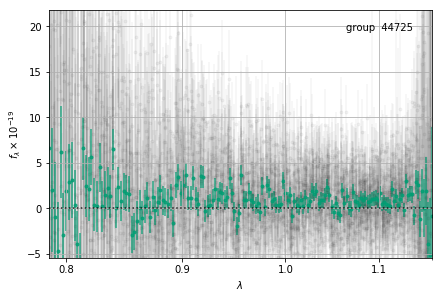

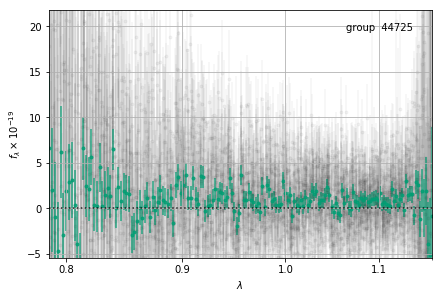

In [37]:
ex.mb.oned_figure()

In [38]:
gsd_cat

,phot_id_x,grism_id_x,jh_mag_x,z_spec_x,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism_x,...,n_271,L272,n_272,L273,n_273,L274,n_274,L275,n_275,UVJ
139,26272,b'GS4-G102_26272',22.751,-1.000,1.5313,1.430,1.478,1.586,1.642,1.5434,...,28,0.128131,28,0.268388,28,0.305359,28,8.30583,6,Q
680,29257,b'GS4-G102_29257',23.318,-1.000,1.6039,1.430,1.544,1.661,1.724,1.6393,...,28,0.201705,28,0.314958,29,0.339811,31,5.71485,6,Q
903,36095,b'GS3-G102_36095',21.417,-1.000,1.9536,1.888,1.920,1.987,2.015,1.9476,...,28,1.353240,28,2.074530,31,2.204460,32,38.10630,8,Q
359,38843,b'GS5-G102_38843',22.964,-1.000,1.6311,1.543,1.579,1.686,1.721,1.5294,...,28,0.167982,28,0.391517,29,0.450130,31,8.31035,6,Q
1602,39012,b'ERSPRIME-G102_39012',22.311,-1.000,1.5764,1.508,1.539,1.611,1.652,1.6117,...,28,0.103990,28,0.272681,28,0.314029,31,14.71080,6,Q
1683,39364,b'ERSPRIME-G102_39364',21.299,-1.000,1.6535,1.591,1.616,1.692,1.716,1.6078,...,28,1.177750,28,2.190460,30,2.447330,31,37.69070,6,Q
303,40223,b'GS5-G102_40223',22.548,-1.000,1.6111,1.558,1.581,1.642,1.665,1.5922,...,28,0.179707,28,0.417178,28,0.486177,31,12.22330,6,Q
958,41520,b'GS3-G102_41520',22.013,-1.000,1.6205,1.579,1.596,1.646,1.664,1.6039,...,28,0.214825,28,0.554250,28,0.649462,29,20.06920,6,Q
693,41886,b'GS5-G102_41886',22.800,2.090,2.1359,2.089,2.107,2.165,2.192,2.0603,...,28,0.948473,31,1.297600,32,1.398940,32,14.28800,8,Q
97,42113,b'GS3-G102_42113',21.427,-1.000,1.6176,1.577,1.593,1.642,1.664,1.6130,...,28,0.325174,28,0.885000,28,1.017520,31,33.78070,6,Q
